<a href="https://colab.research.google.com/github/semilem/cmr_pub/blob/main/SpyVHood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

tickers =['AAPL','AMC','TSLA','MSFT','NIO','DIS','F','GME','AMZN','LCID']
startdate = '2023-01-01'
enddate = '2023-12-09'
df = yf.download('SPY',
                      start=startdate,
                      end=enddate,
                      progress=False)
close = df['Adj Close'].to_frame()
close.columns = ['SPY']

In [ ]:

print('Getting...')
for ticker in tickers:
  print(ticker)
  df = yf.download(ticker,
                      start=startdate,
                      end=enddate,
                      progress=False)
  close[ticker] = df['Adj Close']

close_norm = close.div(close.iloc[0])
close_tickers_sum = close_norm[tickers].sum(axis=1)
close_tickers_sum = close_tickers_sum.div(close_tickers_sum.iloc[0])

Getting...
AAPL
AMC
TSLA
MSFT
NIO
DIS
F
GME
AMZN
LCID


In [ ]:
display(close_tickers_sum)

Date
2023-01-03    1.000000
2023-01-04    1.027376
2023-01-05    1.009008
2023-01-06    1.020109
2023-01-09    1.043471
                ...   
2023-12-04    1.163552
2023-12-05    1.156304
2023-12-06    1.159088
2023-12-07    1.177031
2023-12-08    1.182456
Length: 236, dtype: float64

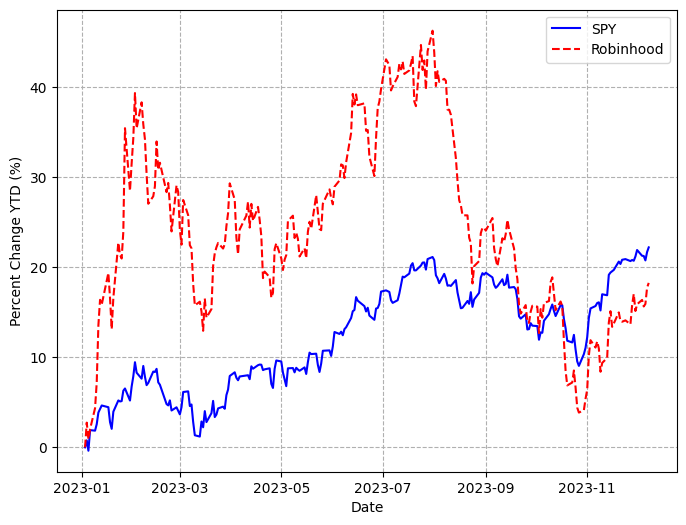

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(close_norm.index, (close_norm.SPY-1)*100, 'b', label='SPY')
plt.plot(close_norm.index, (close_tickers_sum-1)*100, 'r--', label='Robinhood')
plt.ylabel('Percent Change YTD (%)')
plt.xlabel('Date')
plt.grid(linestyle = '--')
plt.legend()
plt.show()

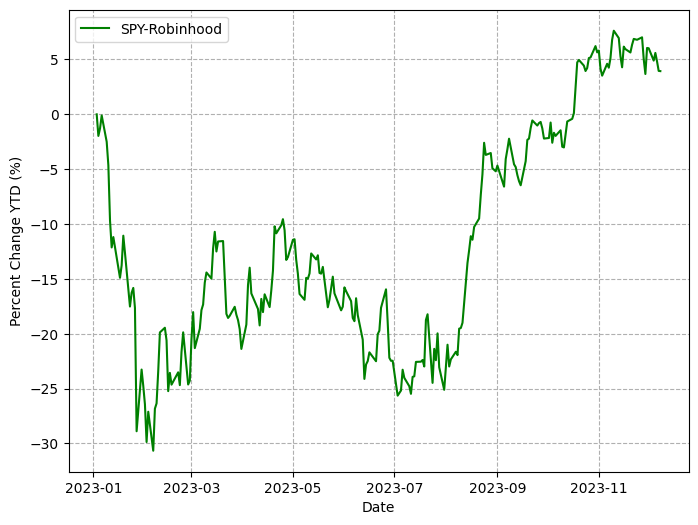

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(close_norm.index, (close_norm.SPY-close_tickers_sum)*100, 'g', label='SPY-Robinhood')
plt.ylabel('Percent Change YTD (%)')
plt.xlabel('Date')
plt.grid(linestyle = '--')
plt.legend()
plt.show()